### helper file to handle GCNFN model implementation in https://github.com/safe-graph/GNN-FakeNews

### This model is specifically designed

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from util import run_model, GNNModelExplainer
from GNNFakeNews.utils.helpers import HparamFactory
from GNNFakeNews.utils.enums import GNNDatasetTypeEnum, GNNModelTypeEnum

# 1.1. UPFD_GCNFN

## DATASET TYPE = POLITIFACT, FEATURE = SPACY

In [3]:
model_type = GNNModelTypeEnum.UPFD_GCNFN
upfd_model_plt, politifact_dataset_manager = run_model(model_type)

#################################
-----> The hyperparameters are set!
model_type = GNNModelTypeEnum.UPFD_GCNFN
dataset = GNNDatasetTypeEnum.POLITIFACT
batch_size = 128
lr = 0.01
weight_decay = 0.001
n_hidden = 128
epochs = 60
transform = <GNNFakeNews.utils.data_loader.ToUndirected object at 0x7f62f1d3d0d0>
feature = GNNFeatureTypeEnum.SPACY
concat = False
#################################
Loading dataset 'politifact' from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local
Test set results: acc: 0.6606, f1_macro: 0.6452, f1_micro: 0.6606,precision: 0.7997, recall: 0.4503, auc: 0.7833, ap: 0.7732


Explain graph: 100%|██████████| 200/200 [00:01<00:00, 152.53it/s]


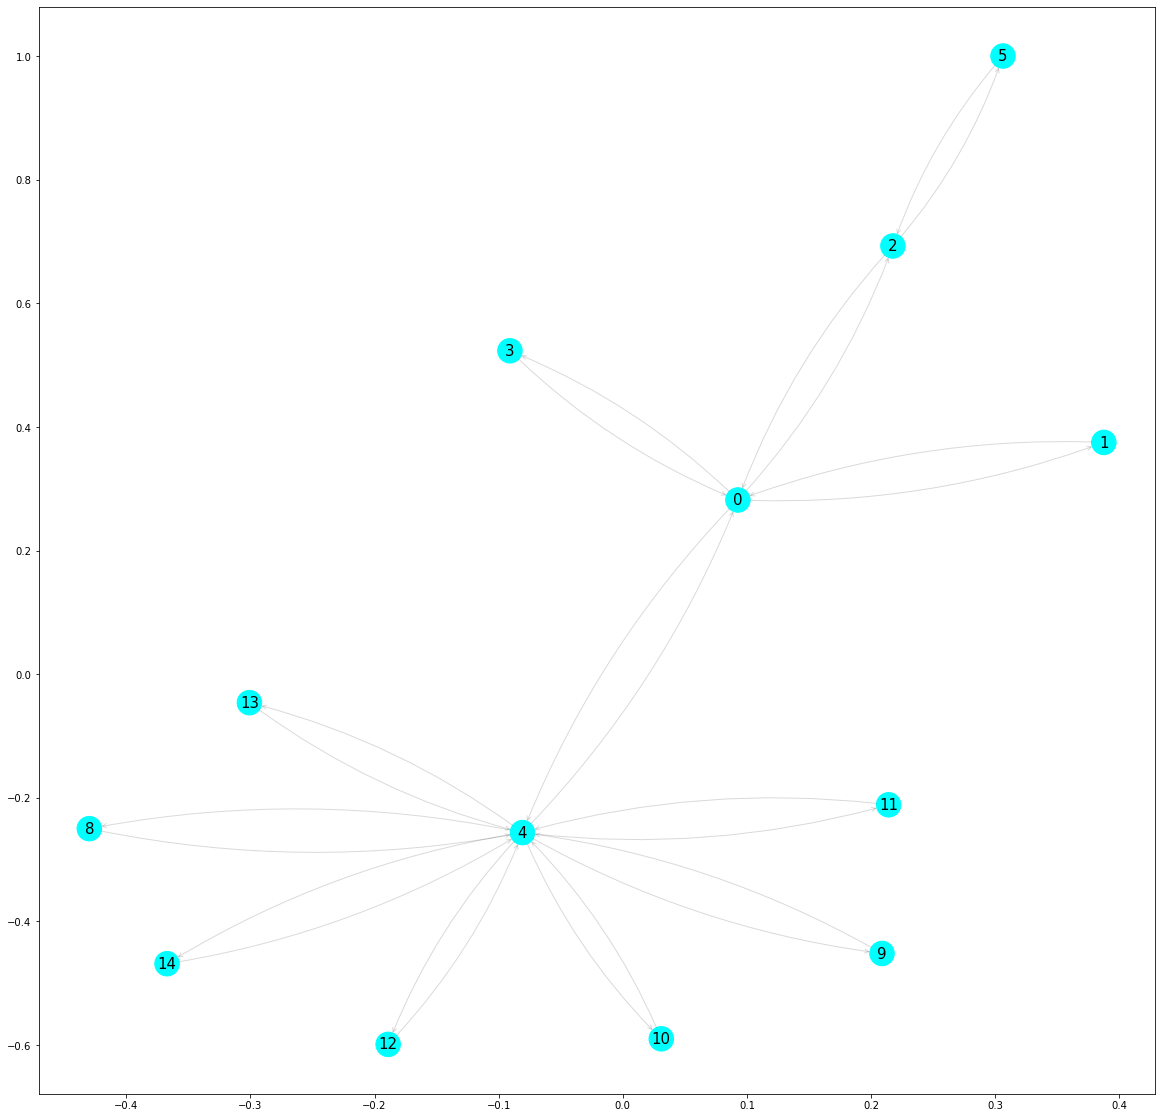

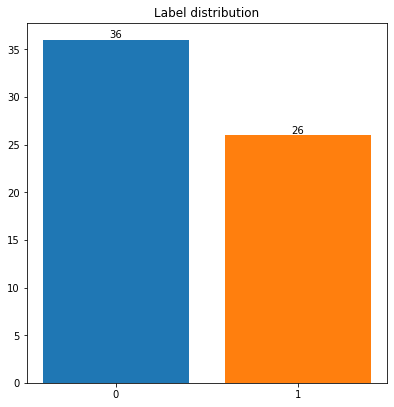

In [4]:
sample_data_plt = politifact_dataset_manager.get_train_samples()[0].to(upfd_model_plt.m_args.device)
gcn_model_politifact_explainer = GNNModelExplainer(upfd_model_plt, sample_data_plt)

## DATASET TYPE = GOSSIPCOP, FEATURE = SPACY

In [5]:
hparams = HparamFactory(model_type, dataset=GNNDatasetTypeEnum.GOSSIPCOP)
upfd_model_gs, gossipcop_dataset_manager = run_model(GNNModelTypeEnum.UPFD_GCNFN, hparams=hparams)

#################################
-----> The hyperparameters are set!
model_type = GNNModelTypeEnum.UPFD_GCNFN
dataset = GNNDatasetTypeEnum.GOSSIPCOP
batch_size = 128
lr = 0.01
weight_decay = 0.001
n_hidden = 128
epochs = 60
transform = <GNNFakeNews.utils.data_loader.ToUndirected object at 0x7f62e9982c50>
feature = GNNFeatureTypeEnum.SPACY
concat = False
#################################
Loading dataset 'gossipcop' from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local
Test set results: acc: 0.9613, f1_macro: 0.9611, f1_micro: 0.9613,precision: 0.9755, recall: 0.9471, auc: 0.9871, ap: 0.9898


Explain graph: 100%|██████████| 200/200 [00:01<00:00, 121.42it/s]


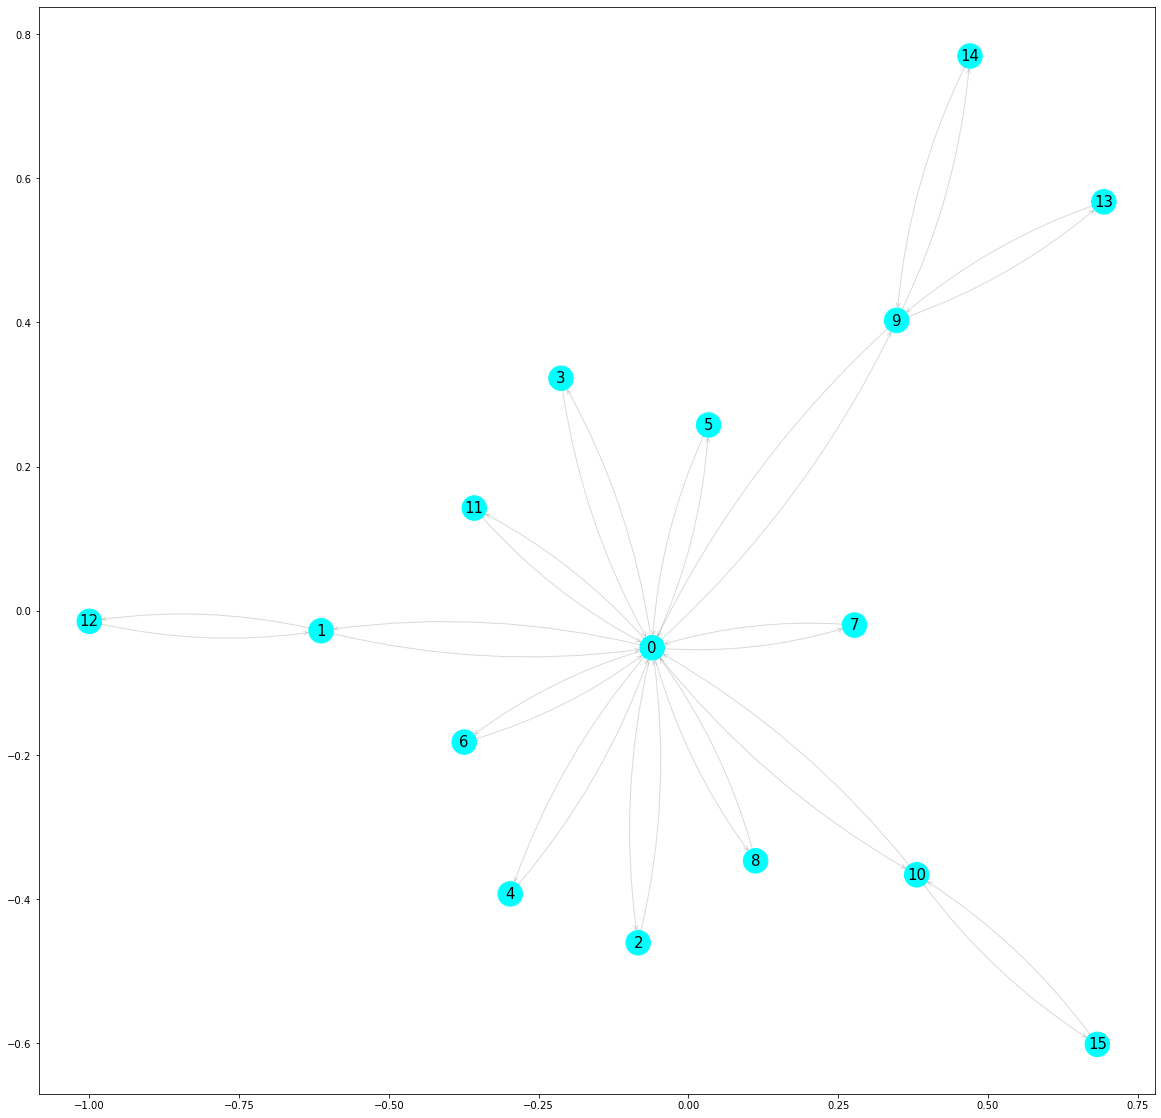

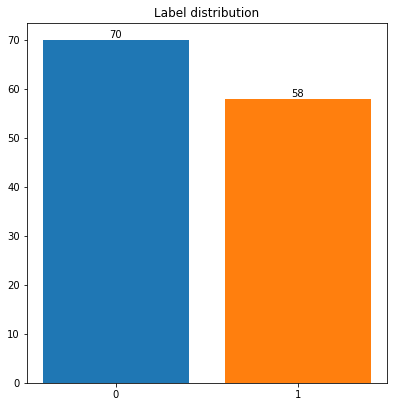

In [7]:
sample_data_gs = gossipcop_dataset_manager.get_train_samples()[0].to(upfd_model_gs.m_args.device)
gcn_model_gossipcop_explainer = GNNModelExplainer(upfd_model_gs, sample_data_gs)

In [20]:
# spacy embeddings, comments embedded in 300 dim vector.
# node_feat_mask gives the importance scores for each token considering the whole structure of the graph data.
gcn_model_gossipcop_explainer.gnn_explainer.node_feat_mask

torch.Size([1, 300])

In [31]:
type(sample_data_gs)

torch_geometric.data.batch.DataBatch

In [38]:
from torch import BoolTensor
sg = sample_data_gs.subgraph(BoolTensor([True for _ in range(sample_data_gs.num_nodes)]))

In [42]:
sg.node_stores[0]

{'edge_index': tensor([[   0,    0,    0,  ..., 7758, 7759, 7759],
        [   0,    1,    2,  ..., 7758, 7751, 7759]], device='cuda:0'), 'x': tensor([[-0.1007,  0.1034, -0.1474,  ..., -0.1357,  0.0299,  0.0979],
        [-0.0396,  0.1273, -0.0451,  ..., -0.0618, -0.0336,  0.0042],
        [-0.0427,  0.1240, -0.0529,  ..., -0.0500, -0.0137,  0.0420],
        ...,
        [-0.0281,  0.1194, -0.0462,  ..., -0.0516,  0.0039,  0.0258],
        [-0.0430,  0.1398, -0.1144,  ..., -0.0362,  0.0284,  0.0594],
        [-0.0310,  0.1267,  0.0019,  ..., -0.0471, -0.0372,  0.0607]],
       device='cuda:0'), 'y': tensor([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,

In [13]:
# represents the connections between nodes
len(gcn_model_gossipcop_explainer.edge_mask)

23024